# Data Analysis with Linear-Regression

## Brain Data

### Author : Du'a Jaradat

## **Imports**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## **Read the data**
**Load the data you receive into a Pandas DataFrame,
Show the first five rows of the data set.**

In [2]:
brain_df=pd.read_csv('dataset.csv')
brain_df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## **Description**
**Show the description of the data set.**

In [3]:
brain_df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


## **Information** 
**Show the info of the data set.**

In [4]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
brain_df[['Head Size(cm^3)','Brain Weight(grams)']]

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


### **Plotting**
 ***How the Brain size and Brain weight are related***

### **Get the data in the way we need *

In [6]:
X=brain_df['Head Size(cm^3)'].values
X

array([4512, 3738, 4261, 3777, 4177, 3585, 3785, 3559, 3613, 3982, 3443,
       3993, 3640, 4208, 3832, 3876, 3497, 3466, 3095, 4424, 3878, 4046,
       3804, 3710, 4747, 4423, 4036, 4022, 3454, 4175, 3787, 3796, 4103,
       4161, 4158, 3814, 3527, 3748, 3334, 3492, 3962, 3505, 4315, 3804,
       3863, 4034, 4308, 3165, 3641, 3644, 3891, 3793, 4270, 4063, 4012,
       3458, 3890, 4166, 3935, 3669, 3866, 3393, 4442, 4253, 3727, 3329,
       3415, 3372, 4430, 4381, 4008, 3858, 4121, 4057, 3824, 3394, 3558,
       3362, 3930, 3835, 3830, 3856, 3249, 3577, 3933, 3850, 3309, 3406,
       3506, 3907, 4160, 3318, 3662, 3899, 3700, 3779, 3473, 3490, 3654,
       3478, 3495, 3834, 3876, 3661, 3618, 3648, 4032, 3399, 3916, 4430,
       3695, 3524, 3571, 3594, 3383, 3499, 3589, 3900, 4114, 3937, 3399,
       4200, 4488, 3614, 4051, 3782, 3391, 3124, 4053, 3582, 3666, 3532,
       4046, 3667, 2857, 3436, 3791, 3302, 3104, 3171, 3572, 3530, 3175,
       3438, 3903, 3899, 3401, 3267, 3451, 3090, 34

In [7]:
y=brain_df['Brain Weight(grams)'].values
y

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375, 1340,
       1380, 1355, 1522, 1208, 1405, 1358, 1292, 1340, 1400, 1357, 1287,
       1275, 1270, 1635, 1505, 1490, 1485, 1310, 1420, 1318, 1432, 1364,
       1405, 1432, 1207, 1375, 1350, 1236, 1250, 1350, 1320, 1525, 1570,
       1340, 1422, 1506, 1215, 1311, 1300, 1224, 1350, 1335, 1390, 1400,
       1225, 1310, 1560, 1330, 1222, 1415, 1175, 1330, 1485, 1470, 1135,
       1310, 1154, 1510, 1415, 1468, 1390, 1380, 1432, 1240, 1195, 1225,
       1188, 1252, 1315, 1245, 1430, 1279, 1245, 1309, 1412, 1120, 1220,
       1280, 1440, 1370, 1192, 1230, 1346, 1290, 1165, 1240, 1132, 1242,
       1270, 1218, 1430, 1588, 1320, 1290, 1260, 1425, 1226, 1360, 1620,
       1310, 1250, 1295, 1290, 1290, 1275, 1250, 1270, 1362, 1300, 1173,
       1256, 1440, 1180, 1306, 1350, 1125, 1165, 1312, 1300, 1270, 1335,
       1450, 1310, 1027, 1235, 1260, 1165, 1080, 1127, 1270, 1252, 1200,
       1290, 1334, 1380, 1140, 1243, 1340, 1168, 13

## Splitting 
**Using a regression model, split your data into train and test data.**

In [8]:
# Reshape the observations to matrix
X=X.reshape(-1,1)
X

array([[4512],
       [3738],
       [4261],
       [3777],
       [4177],
       [3585],
       [3785],
       [3559],
       [3613],
       [3982],
       [3443],
       [3993],
       [3640],
       [4208],
       [3832],
       [3876],
       [3497],
       [3466],
       [3095],
       [4424],
       [3878],
       [4046],
       [3804],
       [3710],
       [4747],
       [4423],
       [4036],
       [4022],
       [3454],
       [4175],
       [3787],
       [3796],
       [4103],
       [4161],
       [4158],
       [3814],
       [3527],
       [3748],
       [3334],
       [3492],
       [3962],
       [3505],
       [4315],
       [3804],
       [3863],
       [4034],
       [4308],
       [3165],
       [3641],
       [3644],
       [3891],
       [3793],
       [4270],
       [4063],
       [4012],
       [3458],
       [3890],
       [4166],
       [3935],
       [3669],
       [3866],
       [3393],
       [4442],
       [4253],
       [3727],
       [3329],
       [34

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=20)

## **Create an Instance of Linear Regression Class**
**Fit your training split to the regression model.**

In [10]:
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

**Show your regression model’s score.**

In [11]:
print(f'Training Accuracy : {round(lm.score(x_train,y_train)*100,2)}%')

print(f'Training Accuracy : {round(lm.score(x_test,y_test)*100,2)}%')

Training Accuracy : 64.23%
Training Accuracy : 61.49%


**Draw at least three conclusions from your regression model.**

Text(0.5, 1.0, 'Brain Data')

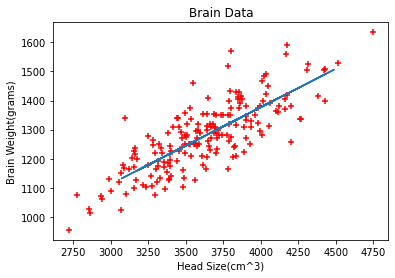

In [12]:
plt.scatter(x_train,y_train,color='red',marker='+')
y_predict=lm.predict(x_test)
plt.plot(x_test,y_predict)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Brain Data')
